In [65]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import sys
from glob import glob
from tqdm import tqdm
from time import time

sys.path.append('/home/groups/dpwall/briannac/general_scripts')

from plotting.pvals_distribution_plots import PlotPvals

BAM_MAPPINGS_FILE = '/home/groups/dpwall/briannac/general_data/bam_mappings.csv'

bam_mappings = pd.read_table(BAM_MAPPINGS_FILE, index_col=1)

In [62]:
relevant_files = [(f,int(f.split('/')[-1].replace('.tsv.gz', '').replace('coverages.all.',''))) for f in glob(
    '/home/groups/dpwall/briannac/y_chromosome_mismappings/results/coverages/all/coverages.all.*.tsv.gz')]
relevant_files = [i[0] for i in sorted(relevant_files, key=lambda x: x[1])]
print(relevant_files)

['/home/groups/dpwall/briannac/y_chromosome_mismappings/results/coverages/all/coverages.all.0000.tsv.gz']


In [ ]:
first_idx = True
for i, f in tqdm(enumerate(relevant_files)):
    chunk = pd.read_table(f)
    if first_idx: 
        sums = chunk.sum()
        first_idx = False
    else: sums = sums + chunk.sum()
pvals = []
for i, f in tqdm(enumerate(relevant_files)):
    chunk = pd.read_table(f)
    norm_vals = chunk/sums
    norm_vals = norm_vals[norm_vals.columns[sums>0]]
    males = norm_vals[norm_vals.columns[
            (bam_mappings.loc[norm_vals.columns].sex_numeric=='1.0') & (bam_mappings.loc[norm_vals.columns].relationship!='sibling')]]
    females = norm_vals[norm_vals.columns[(bam_mappings.loc[norm_vals.columns].sex_numeric=='2.0') & (bam_mappings.loc[norm_vals.columns].relationship!='sibling')]]
    pvals = pvals + list(stats.ttest_ind(males, females, axis=1).pvalue)


0it [00:00, ?it/s]

In [77]:
pvals = np.array(pvals)
pvals = pvals[~np.isnan(pvals)]

In [80]:
len(p[~np.isnan(p)])

8

In [52]:
df = pd.read_table('/home/groups/dpwall/briannac/y_chromosome_mismappings/results/coverages/all/coverages.all.0000.tsv.gz', nrows=50000)

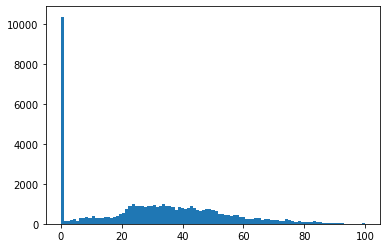

In [54]:
plt.hist(df['MH0128718'].values, bins=np.linspace(0,100,100))
plt.show()

In [43]:
chrom_starts_stops = pd.read_table('/home/groups/dpwall/briannac/y_chromosome_mismappings/intermediate_files/coverages/chrom_start_stops_intervals.tsv')

In [51]:
for idx, start, stop  in zip(chrom_starts_stops['0'].values, chrom_starts_stops['1'].values, chrom_starts_stops['2'].values):
    t = time()
    test = np.loadtxt('/home/groups/dpwall/briannac/y_chromosome_mismappings/intermediate_files/coverages/02C10946.unmapped.txt', skiprows=1+start, max_rows=1000000)
    np.savetxt('/home/groups/dpwall/briannac/y_chromosome_mismappings/intermediate_files/coverages/02C10946_%s.unmapped.txt' % idx, test)
    print(idx, time()-t)

chr1_0 6.973549127578735
chr1_1 7.098416328430176
chr1_2 7.284839630126953
chr1_3 7.600953578948975
chr1_4 7.56645655632019
chr1_5 7.770650148391724
chr1_6 8.07184648513794
chr1_7 8.184273719787598
chr1_8 8.282311201095581
chr1_9 8.51613736152649
chr1_10 8.719014883041382
chr1_11 8.941030025482178
chr1_12 9.099337339401245
chr1_13 9.225812673568726
chr1_14 9.441660642623901
chr1_15 9.660914659500122
chr1_16 9.796653985977173
chr1_17 10.000363826751709
chr1_18 10.157233238220215
chr1_19 10.299034357070923
chr1_20 10.841980218887329
chr1_21 10.699199676513672
chr1_22 10.89181399345398
chr1_23 11.026844024658203
chr1_24 11.888429641723633
chr1_25 11.470055103302002


KeyboardInterrupt: 

In [33]:

t = time()
test = np.loadtxt('/home/groups/dpwall/briannac/y_chromosome_mismappings/intermediate_files/coverages/02C10946.unmapped.txt', skiprows=1, max_rows=10000000)
print(time()-t)

44.19847369194031


In [36]:
t = time()
test = np.loadtxt('/home/groups/dpwall/briannac/y_chromosome_mismappings/intermediate_files/coverages/02C10946.unmapped.txt', skiprows=10000000, max_rows=1000000)
np.savetxt('/home/groups/dpwall/briannac/y_chromosome_mismappings/intermediate_files/coverages/02C10946.unmapped.txt')
print(time()-t)

6.333582162857056


In [40]:
7*3000/60/60

5.833333333333333

In [3]:
bam_mappings = pd.read_table(BAM_MAPPINGS_FILE, index_col=1)

In [67]:
males

,02C10540,02C10858,02C10946,02C10955,02C11036,02C11099,02C11393,02C11453,02C11465,02C11503,...,MH0130591,MH0131373,MH0131382,MH0132929,MH0132952,MH0135248,MH0137425,MH0138043,MH0138051,MH0143008
0,0.000108,0.000077,0.000117,0.000109,0.000092,0.000082,0.000116,0.000119,0.000120,0.000121,...,0.000101,0.000130,0.000118,0.000095,0.000128,0.000121,0.000114,0.000092,0.000078,0.000108
1,0.000108,0.000077,0.000122,0.000109,0.000092,0.000082,0.000116,0.000119,0.000120,0.000121,...,0.000101,0.000130,0.000118,0.000095,0.000134,0.000121,0.000114,0.000092,0.000078,0.000105
2,0.000113,0.000074,0.000122,0.000109,0.000092,0.000082,0.000118,0.000119,0.000120,0.000123,...,0.000104,0.000130,0.000121,0.000095,0.000131,0.000124,0.000114,0.000092,0.000078,0.000105
3,0.000113,0.000077,0.000124,0.000111,0.000090,0.000082,0.000118,0.000125,0.000120,0.000123,...,0.000106,0.000130,0.000123,0.000095,0.000131,0.000124,0.000111,0.000092,0.000078,0.000108
4,0.000110,0.000077,0.000124,0.000111,0.000092,0.000085,0.000118,0.000128,0.000122,0.000128,...,0.000106,0.000125,0.000121,0.000095,0.000128,0.000124,0.000111,0.000092,0.000078,0.000108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000113,0.000096,0.000109,0.000128,0.000092,0.000092,0.000118,0.000106,0.000111,0.000082,...,0.000101,0.000145,0.000084,0.000106,0.000102,0.000131,0.000120,0.000127,0.000109,0.000105
9996,0.000115,0.000096,0.000109,0.000128,0.000092,0.000092,0.000116,0.000103,0.000109,0.000082,...,0.000099,0.000142,0.000086,0.000103,0.000102,0.000131,0.000117,0.000124,0.000106,0.000103
9997,0.000115,0.000093,0.000109,0.000128,0.000092,0.000089,0.000116,0.000109,0.000109,0.000080,...,0.000097,0.000139,0.000086,0.000103,0.000102,0.000131,0.000114,0.000124,0.000106,0.000103
9998,0.000118,0.000093,0.000104,0.000128,0.000092,0.000089,0.000116,0.000109,0.000109,0.000080,...,0.000097,0.000142,0.000089,0.000106,0.000099,0.000131,0.000114,0.000124,0.000106,0.000105


In [152]:
#covs_proper = pd.read_table(COV_FILE_PROPER)
covs_proper = pd.read_table(COV_FILE_IMPROPER, chunksize=1000000)
#covs_unmapped = pd.read_table(COV_FILE_UNMAPPED)
bam_mappings = pd.read_table(BAM_MAPPINGS_FILE, index_col=1)

In [ ]:
for i, chunk in enumerate(pd.read_table(COV_FILE_PROPER, chunksize=1000000, skiprows=1)):
    print(i)
    if i==0: sums = chunk.sum()
    else: sums = sums + chunk.sum()
pvals = []
for i, chunk in enumerate(pd.read_table(COV_FILE_PROPER, chunksize=10000000, skiprows=1)):
    print(i)
    print(i)
    norm_vals = chunk/sums
    norm_vals = norm_vals[norm_vals.columns[sums>0]]
    males = norm_vals[norm_vals.columns[bam_mappings.loc[norm_vals.columns].sex_numeric=='1.0']]
    females = norm_vals[norm_vals.columns[bam_mappings.loc[norm_vals.columns].sex_numeric=='2.0']]
    pvals = pvals + list(stats.ttest_ind(males, females, axis=1).pvalue)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [ ]:
PlotPvals(np.array(pvals)) # Beautiful!!!

In [253]:
bam_mappings = bam_mappings[(bam_mappings['relationship']=='sibling')]
bam_mappings['derived_affected_status'] = [str(s) for s in bam_mappings.derived_affected_status]

In [252]:
bam_mappings['fam_and_status'] = [(f,d, m, p) for f,d,m,p in zip(bam_mappings.family, bam_mappings.derived_affected_status,
                                                            bam_mappings.MotherID, bam_mappings.FatherID)]

In [239]:
females = bam_mappings[bam_mappings.sex_numeric=='2.0']
males = bam_mappings[bam_mappings.sex_numeric=='1.0']

In [244]:
pair_df = pd.DataFrame(np.equal.outer(females.fam_and_status.values, males.fam_and_status.values))
pair_df.index = females.index
pair_df.columns = males.index
pairs = []
while pair_df.sum().sum()>0:
    female_idx, male_idx = np.where(pair_df)
    rand_idx = np.random.randint(len(female_idx))
    new_pair = (pair_df.index[female_idx[rand_idx]], pair_df.columns[male_idx[rand_idx]])
    pairs = pairs + [new_pair]
    pair_df = pair_df.drop(
        pair_df.index[female_idx[rand_idx]], axis=0).drop(
        pair_df.columns[male_idx[rand_idx]], axis=1)

In [ ]:
female_in_pair = covs[[p[0] for p in pairs]]
male_in_pair = covs[[p[1] for p in pairs]]

In [188]:
t = stats.ttest_rel(female_in_pair.iloc[:1000], male_in_pair.iloc[:1000], axis=0)

/home/users/briannac/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


/home/users/briannac/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/users/briannac/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 1.,  4.,  1.,  5.,  3.,  3.,  5.,  5.,  3., 10.]),
 array([-186.26615828, -167.67341142, -149.08066456, -130.4879177 ,
        -111.89517084,  -93.30242398,  -74.70967712,  -56.11693026,
         -37.5241834 ,  -18.93143654,   -0.33868969]),
 <BarContainer object of 10 artists>)

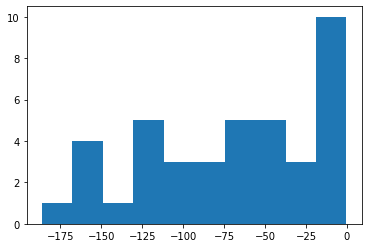

In [193]:
plt.hist(np.log10(t.pvalue))

In [198]:
np.unique(male_in_pair.mean())

array([12.40681622, 13.61691113, 16.51768766, 17.31622088, 17.41716997,
       17.47497843, 17.66781708, 18.36194996, 19.09922347, 19.22044866,
       20.23813632, 20.46462468, 20.68809318, 21.94305436, 22.60181191,
       23.33951682,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

In [200]:
np.unique(female_in_pair.mean())

array([10.91932701, 15.17256255, 20.11993097, 21.13157895, 21.55478861,
       21.92666091, 23.37532355, 24.62597066,         nan,         nan,
               nan,         nan,         nan])